# Correlation Analysis

In [45]:
#Dependancies 
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

In [46]:
#Store CSV File in DataFrame
us_nc_df = pd.read_csv("US_NC_Combined.csv")

us_nc_df.head()

,Unnamed: 0,date,US Population,US Deaths,US DeathIncrease,US inICUCumulative,US inICUCurrently,US HospitalizedIncrease,US HospitalizedCurrently,US HospitalizedCumulative,...,NC InIcuCumulative,NC InIcuCurrently,NC Negative,NC NegativeIncrease,NC OnVentilatorCumulative,NC OnVentilatorCurrently,NC Positive,NC PositiveIncrease,NC TotalTestResults,NC TotalTestResultsIncrease
0,0,2021-03-07,332031554,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,0.0,9688838.0,0.0
1,1,2021-03-06,332031554,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,2027.0,9688838.0,38654.0
2,2,2021-03-05,332031554,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,...,0.0,314.0,0.0,0.0,0.0,0.0,870149.0,2093.0,9650184.0,44487.0
3,3,2021-03-04,332031554,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,...,0.0,326.0,0.0,0.0,0.0,0.0,868056.0,2502.0,9605697.0,44050.0
4,4,2021-03-03,332031554,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,...,0.0,332.0,0.0,0.0,0.0,0.0,865554.0,2145.0,9561647.0,19976.0


In [47]:
#Column List
list(us_nc_df.columns)

['Unnamed: 0',
 'date',
 'US Population',
 'US Deaths',
 'US DeathIncrease',
 'US inICUCumulative',
 'US inICUCurrently',
 'US HospitalizedIncrease',
 'US HospitalizedCurrently',
 'US HospitalizedCumulative',
 'US Negative',
 'US NegativeIncrease',
 'US OnVentilatorCumulative',
 'US OnVentilatorCurrently',
 'US Positive',
 'US PositiveIncrease',
 'US TotalTestResults',
 'US TotalTestResultsIncrease',
 'NC Population',
 'NC death',
 'NC DeathIncrease',
 'NC HospitalizedCumulative',
 'NC HospitalizedCurrently',
 'NC HospitalizedIncrease',
 'NC InIcuCumulative',
 'NC InIcuCurrently',
 'NC Negative',
 'NC NegativeIncrease',
 'NC OnVentilatorCumulative',
 'NC OnVentilatorCurrently',
 'NC Positive',
 'NC PositiveIncrease',
 'NC TotalTestResults',
 'NC TotalTestResultsIncrease']

# Correlation Between Positive Cases & Hospitalzations? - Line Chart

In [49]:
# State Needed Columns
nc_us_positive_hospitalzations = us_nc_df[['date','US Population','US HospitalizedCurrently','US Positive','NC Population','NC HospitalizedCurrently','NC Positive']].copy()

# Creates Timeframe to Analyze
nc_us_positive_hospitalzations['date'] = pd.to_datetime(nc_us_positive_hospitalzations['date'])
print(nc_us_positive_hospitalzations['date'].dtypes)

# Set date as the index
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.set_index('date')

# Reverse the order for graphing
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.iloc[::-1]

# Drop rows with null values
nc_us_positive_hospitalzations = nc_us_positive_hospitalzations.dropna()

# Add per-capita rows
nc_us_positive_hospitalzations['US Hospitalized Per Capita'] = (nc_us_positive_hospitalzations['US HospitalizedCurrently'] / nc_us_positive_hospitalzations['US Population']) * 100000
nc_us_positive_hospitalzations['NC Hospitalized Per Capita'] = (nc_us_positive_hospitalzations['NC HospitalizedCurrently'] / nc_us_positive_hospitalzations['NC Population']) * 100000
nc_us_positive_hospitalzations['US Positive Per Capita'] = (nc_us_positive_hospitalzations['US Positive'] / nc_us_positive_hospitalzations['US Population']) * 100000
nc_us_positive_hospitalzations['NC Positive Per Capita'] = (nc_us_positive_hospitalzations['NC Positive'] / nc_us_positive_hospitalzations['NC Population']) * 100000

nc_us_positive_hospitalzations.head()

datetime64[ns]


,US Population,US HospitalizedCurrently,US Positive,NC Population,NC HospitalizedCurrently,NC Positive,US Hospitalized Per Capita,NC Hospitalized Per Capita,US Positive Per Capita,NC Positive Per Capita
date,,,,,,,,,,
2020-03-04,331511512,0.0,242.0,10449445.0,0.0,1.0,0.0,0.0,0.072999,0.00957
2020-03-05,331511512,0.0,307.0,10449445.0,0.0,1.0,0.0,0.0,0.092606,0.00957
2020-03-06,331511512,0.0,445.0,10449445.0,0.0,2.0,0.0,0.0,0.134234,0.01914
2020-03-07,331511512,0.0,587.0,10449445.0,0.0,2.0,0.0,0.0,0.177068,0.01914
2020-03-08,331511512,0.0,757.0,10449445.0,0.0,2.0,0.0,0.0,0.228348,0.01914


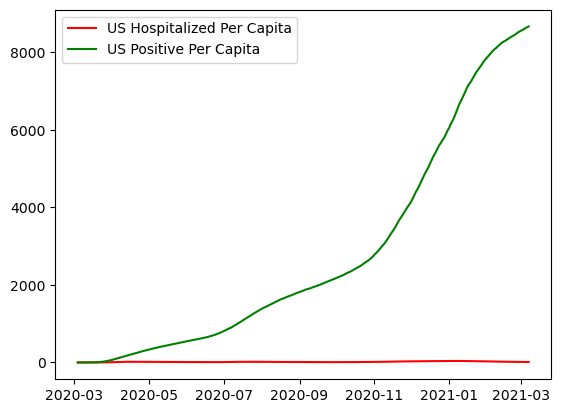

In [51]:
# Plot line charts of US Hospitalized Per Capita and US Positive Per Capita

US_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Hospitalized Per Capita'], label='US Hospitalized Per Capita', color='red')
US_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Positive Per Capita'], label='US Positive Per Capita', color='green')
plt.legend(handles=[US_Hosp_percap, US_Pos_percap], loc='best')NC_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Positive Per Capita'], label='NC Positive Per Capita', color='green')
plt.show()

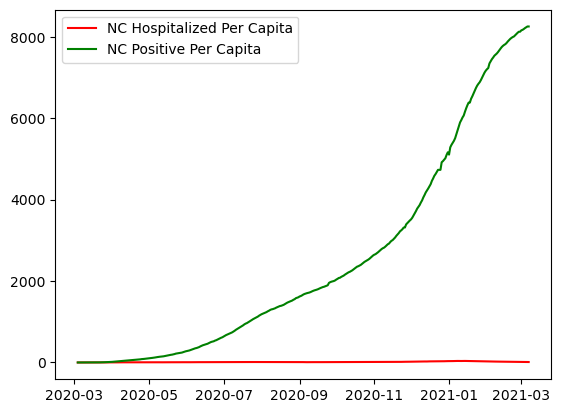

In [52]:
# Plot line charts of NC Hospitalized Per Capita and NC Positive Per Capita

NC_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Hospitalized Per Capita'], label='NC Hospitalized Per Capita', color='red')
NC_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Positive Per Capita'], label='NC Positive Per Capita', color='green')
plt.legend(handles=[NC_Hosp_percap, NC_Pos_percap], loc='best')
plt.show()

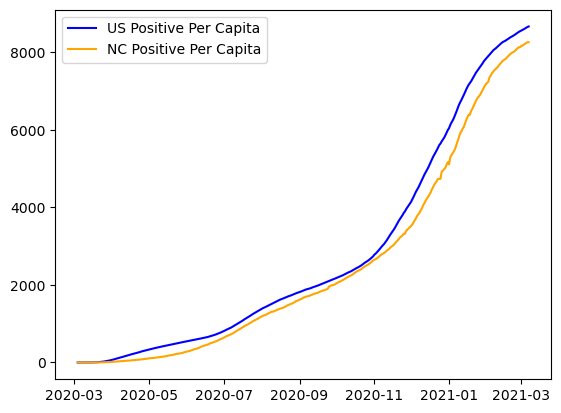

In [53]:
# Plot line charts of US Positive Per Capita and NC Positive Per Capita
US_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Positive Per Capita'], label='US Positive Per Capita', color='blue')
NC_Pos_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Positive Per Capita'], label='NC Positive Per Capita', color='orange')
plt.legend(handles=[US_Pos_percap, NC_Pos_percap], loc='best')
plt.show()

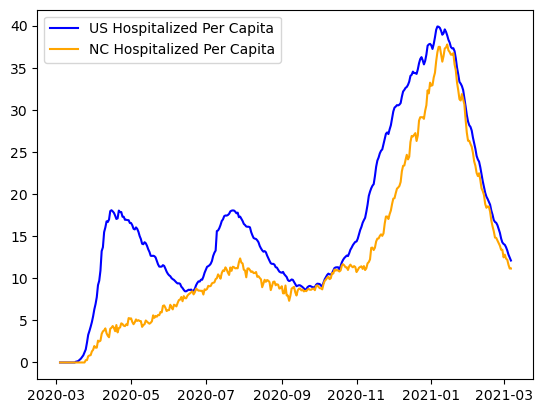

In [55]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['US Hospitalized Per Capita'], label='US Hospitalized Per Capita', color='blue')
NC_Hosp_percap, = plt.plot(nc_us_positive_hospitalzations.index, nc_us_positive_hospitalzations['NC Hospitalized Per Capita'], label='NC Hospitalized Per Capita', color='orange')
plt.legend(handles=[US_Hosp_percap, NC_Hosp_percap], loc='best')
plt.show()

# Correlation between Positive Cases and Hospitilizations - Scatter Plot

# Correlation between # of Test and Deaths - Line Chart

In [56]:
# State Needed Columns
nc_us_deaths_test = us_nc_df[['date','US Population','US Deaths','US TotalTestResults','NC Population','NC death','NC TotalTestResults']].copy()

# Creates Timeframe to Analyze
nc_us_deaths_test['date'] = pd.to_datetime(nc_us_deaths_test['date'])
print(nc_us_deaths_test['date'].dtypes)

# Set date as the index
nc_us_deaths_test = nc_us_deaths_test.set_index('date')

# Reverse the order for graphing
nc_us_deaths_test = nc_us_deaths_test.iloc[::-1]

# Drop rows with null values
nc_us_deaths_test = nc_us_deaths_test.dropna()

# Add per-capita rows
nc_us_deaths_test['US Death Per Capita'] = (nc_us_deaths_test['US Deaths'] / nc_us_deaths_test['US Population']) * 100000
nc_us_deaths_test['NC Death Per Capita'] = (nc_us_deaths_test['NC death'] / nc_us_deaths_test['NC Population']) * 100000
nc_us_deaths_test['US TotalTestResults Per Capita'] = (nc_us_deaths_test['US TotalTestResults'] / nc_us_deaths_test['US Population']) * 100000
nc_us_deaths_test['NC TotalTestResults Per Capita'] = (nc_us_deaths_test['NC TotalTestResults'] / nc_us_deaths_test['NC Population']) * 100000

nc_us_deaths_test.head()

datetime64[ns]


,US Population,US Deaths,US TotalTestResults,NC Population,NC death,NC TotalTestResults,US Death Per Capita,NC Death Per Capita,US TotalTestResults Per Capita,NC TotalTestResults Per Capita
date,,,,,,,,,,
2020-03-04,331511512,16.0,8023,10449445.0,0.0,0.0,0.004826,0.0,2.420127,0.0
2020-03-05,331511512,20.0,9538,10449445.0,0.0,0.0,0.006033,0.0,2.877125,0.0
2020-03-06,331511512,26.0,11715,10449445.0,0.0,0.0,0.007843,0.0,3.533814,0.0
2020-03-07,331511512,27.0,12646,10449445.0,0.0,0.0,0.008145,0.0,3.814649,0.0
2020-03-08,331511512,31.0,13776,10449445.0,0.0,0.0,0.009351,0.0,4.155512,0.0


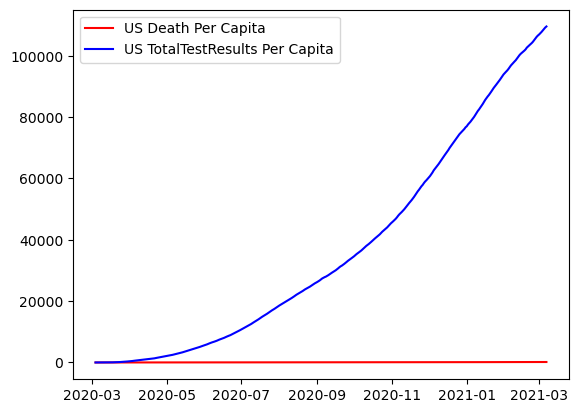

In [67]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US Death Per Capita'], label='US Death Per Capita', color='red')
US_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US TotalTestResults Per Capita'], label='US TotalTestResults Per Capita', color='blue')
plt.legend(handles=[US_Death_percap, US_Test_percap], loc='best')
plt.show()

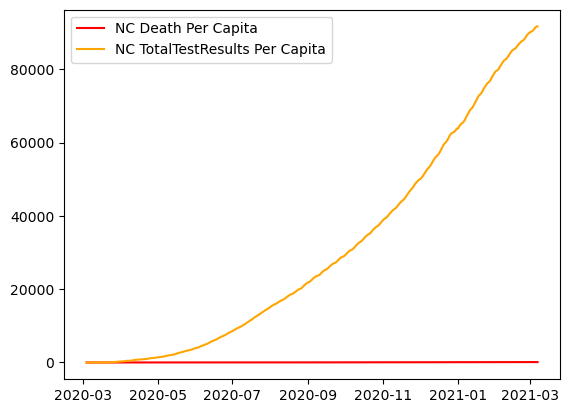

In [65]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
NC_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC Death Per Capita'], label='NC Death Per Capita', color='red')
NC_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC TotalTestResults Per Capita'], label='NC TotalTestResults Per Capita', color='orange')
plt.legend(handles=[NC_Death_percap, NC_Test_percap], loc='best')
plt.show()

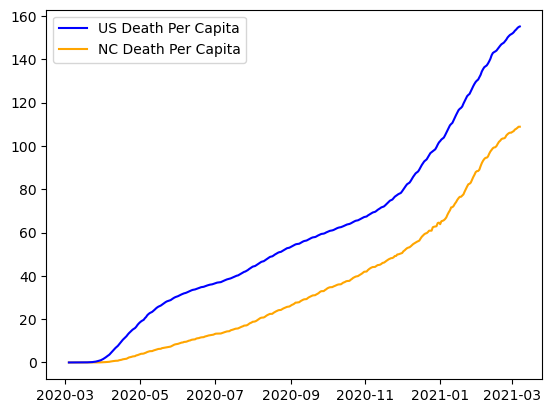

In [64]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
NC_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC Death Per Capita'], label='NC Death Per Capita', color='orange')
US_Death_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US Death Per Capita'], label='US Death Per Capita', color='blue')
plt.legend(handles=[US_Death_percap, NC_Death_percap], loc='best')
plt.show()

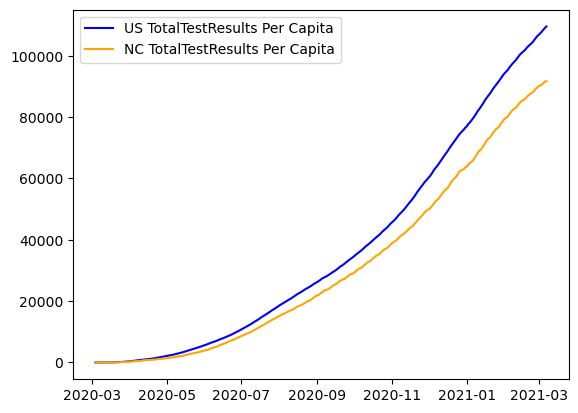

In [63]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita
US_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['US TotalTestResults Per Capita'], label='US TotalTestResults Per Capita', color='blue')
NC_Test_percap, = plt.plot(nc_us_deaths_test.index, nc_us_deaths_test['NC TotalTestResults Per Capita'], label='NC TotalTestResults Per Capita', color='orange')
plt.legend(handles=[US_Test_percap, NC_Test_percap], loc='best')
plt.show()

# Correlation between # of Test and Deaths - Scatter Plot

In [5]:
#Generate related variables
import matplotlib.pyplot as plt
import csv

In [6]:
#Read dataset
data = []
with open ("US_NC_Combined.csv", 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        data.append(dict(row))
        
print(data)

[{'': '0', 'date': '2021-03-07', 'US Population': '332031554', 'US Deaths': '515151.0', 'US DeathIncrease': '842', 'US inICUCumulative': '45475.0', 'US inICUCurrently': '8134.0', 'US HospitalizedIncrease': '726', 'US HospitalizedCurrently': '40199.0', 'US HospitalizedCumulative': '776361.0', 'US Negative': '74582825.0', 'US NegativeIncrease': '131835', 'US OnVentilatorCumulative': '4281.0', 'US OnVentilatorCurrently': '2802.0', 'US Positive': '28756489.0', 'US PositiveIncrease': '41835', 'US TotalTestResults': '363825123', 'US TotalTestResultsIncrease': '1170059', 'NC Population': '10565885.0', 'NC death': '11502.0', 'NC DeathIncrease': '0.0', 'NC HospitalizedCumulative': '0.0', 'NC HospitalizedCurrently': '1179.0', 'NC HospitalizedIncrease': '0.0', 'NC InIcuCumulative': '0.0', 'NC InIcuCurrently': '309.0', 'NC Negative': '0.0', 'NC NegativeIncrease': '0.0', 'NC OnVentilatorCumulative': '0.0', 'NC OnVentilatorCurrently': '0.0', 'NC Positive': '872176.0', 'NC PositiveIncrease': '0.0', '

In [7]:
#fill out 
US_num_of_test = [x['US TotalTestResultsIncrease'] for x in data]
US_deaths = [x['US DeathIncrease'] for x in data]

print(US_num_of_test)
print(US_deaths)

['1170059', '1430992', '1744417', '1590984', '1406795', '1343519', '1154440', '1408422', '1655179', '1803309', '1826144', '1450666', '1193835', '1201247', '1232995', '1290481', '1878033', '1345849', '1298421', '1053698', '1123560', '1439631', '1757608', '1812454', '1855929', '1382709', '1488481', '1400009', '1498808', '1888854', '1868496', '1663995', '1384881', '1385595', '1507545', '1725724', '2139579', '1955101', '1936761', '1626393', '1733799', '1630391', '1792892', '1990072', '2022028', '1933682', '1851350', '1596863', '1771268', '1916756', '2116224', '2309884', '2048899', '1827396', '1944234', '1695767', '2051661', '2137700', '2146223', '1928262', '1650493', '1721007', '1512611', '1444257', '1934350', '1545537', '1797220', '1583713', '1343514', '1332122', '1395240', '1974298', '1568040', '2031894', '1791481', '1770133', '1974590', '1821629', '1859539', '2193466', '1912697', '1839996', '1833138', '2010951', '1827310', '1919896', '1969509', '1967578', '1832545', '1690914', '1653269'

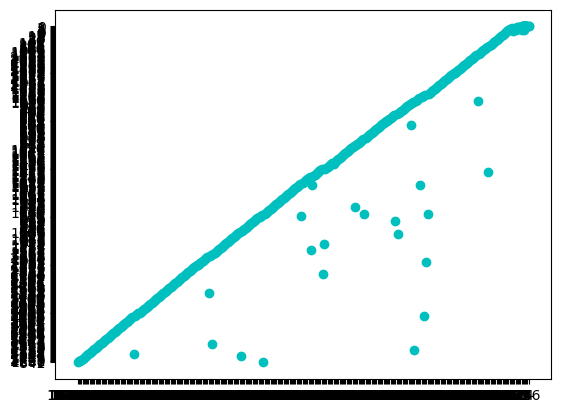

In [9]:
plt.plot(US_num_of_test, US_deaths,'co')
plt.show()